<a href="https://colab.research.google.com/github/jasonstoy/TensorFlow/blob/main/7.%20Multiclass%20Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
(train_data, train_labels), (test_data, test_labels) = fashion_mnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


In [3]:
print(f"Tranining sample:\n{train_data[0]}\n")
print(f"Training label:\n{train_labels[0]}\n")

Tranining sample:
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1 

In [4]:
train_data[0].shape, train_labels[0].shape

((28, 28), ())

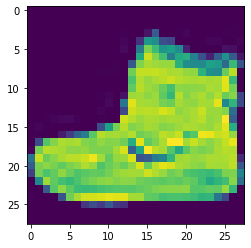

In [5]:
plt.imshow(train_data[0])

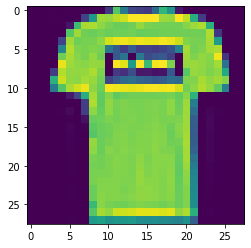

In [6]:
plt.imshow(train_data[1])

In [7]:
# Check out samples labels
train_labels[0], train_labels[1]

(9, 0)

In [8]:
# Create a small list so we can index onto our training labels so they're human-readable
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

len(class_names)

10

Text(0.5, 1.0, 'Bag')

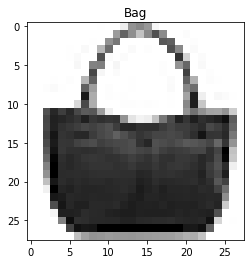

In [9]:
index_of_choice = 100
plt.imshow(train_data[index_of_choice], cmap=plt.cm.binary)
plt.title(class_names[train_labels[index_of_choice]])

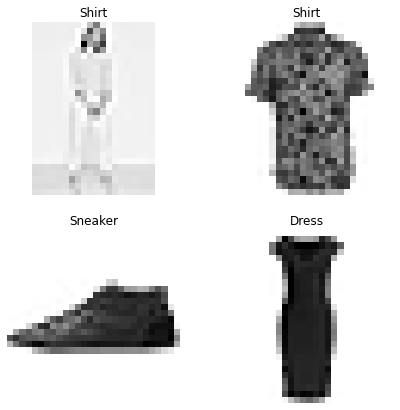

In [10]:
# Plot multiple random images if fanshion MNIST
import random
plt.figure(figsize=(7,7))
for i in range(4):
  ax = plt.subplot(2, 2, i+1)
  rand_index = random.choice(range(len(train_data)))
  plt.imshow(train_data[rand_index],cmap=plt.cm.binary)
  plt.title(class_names[train_labels[rand_index]])
  plt.axis(False)

In [21]:
#Model

model = tf.keras.models.Sequential()

model.add(tf.keras.layers.Flatten(input_shape=(28,28)))
model.add(tf.keras.layers.Dense(800, activation="relu"))
model.add(tf.keras.layers.Dense(400, activation="relu"))
model.add(tf.keras.layers.Dense(200, activation="relu"))
model.add(tf.keras.layers.Dense(10, activation="softmax"))


model.compile(loss=tf.keras.losses.sparse_categorical_crossentropy,
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])

lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4 * 10 **(epoch/20))

history = model.fit(train_data, train_labels, epochs = 10, callbacks=[lr_scheduler])

Epoch 1/10
1875/1875 [==============================] - 7s 4ms/step - loss: 2.5497 - accuracy: 0.7769
Epoch 2/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.7209 - accuracy: 0.8253
Epoch 3/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.4907 - accuracy: 0.8472
Epoch 4/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.4218 - accuracy: 0.8593
Epoch 5/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3772 - accuracy: 0.8669
Epoch 6/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3593 - accuracy: 0.8704
Epoch 7/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3390 - accuracy: 0.8763
Epoch 8/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3315 - accuracy: 0.8793
Epoch 9/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3243 - accuracy: 0.8826
Epoch 10/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.323

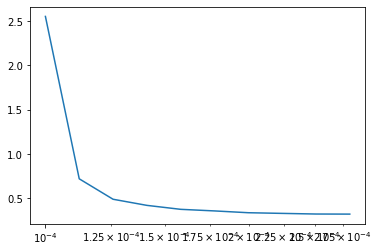

In [22]:
plt.semilogx(history.history['lr'], history.history['loss'])

In [35]:
#Model

model = tf.keras.models.Sequential()

model.add(tf.keras.layers.Flatten(input_shape=(28,28)))
model.add(tf.keras.layers.Dense(800, activation="relu"))
model.add(tf.keras.layers.Dense(400, activation="relu"))
model.add(tf.keras.layers.Dense(200, activation="relu"))
model.add(tf.keras.layers.Dense(10, activation="softmax"))


model.compile(loss=tf.keras.losses.sparse_categorical_crossentropy,
              optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4),
              metrics=["accuracy"])

# lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4 * 10 **(epoch/20))

nonnorm_history = model.fit(train_data, 
                    train_labels, 
                    epochs = 10,
                    validation_data = (test_data, test_labels))

Epoch 1/10
1875/1875 [==============================] - 9s 5ms/step - loss: 2.6605 - accuracy: 0.7784 - val_loss: 0.9847 - val_accuracy: 0.7895
Epoch 2/10
1875/1875 [==============================] - 8s 5ms/step - loss: 0.7018 - accuracy: 0.8270 - val_loss: 0.6387 - val_accuracy: 0.8256
Epoch 3/10
1875/1875 [==============================] - 8s 5ms/step - loss: 0.4838 - accuracy: 0.8503 - val_loss: 0.5260 - val_accuracy: 0.8487
Epoch 4/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3998 - accuracy: 0.8659 - val_loss: 0.4600 - val_accuracy: 0.8532
Epoch 5/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3519 - accuracy: 0.8763 - val_loss: 0.4481 - val_accuracy: 0.8559
Epoch 6/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3196 - accuracy: 0.8850 - val_loss: 0.4183 - val_accuracy: 0.8642
Epoch 7/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2999 - accuracy: 0.8911 - val_loss: 0.4302 - val_accuracy:

In [30]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_6 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_24 (Dense)             (None, 800)               628000    
_________________________________________________________________
dense_25 (Dense)             (None, 400)               320400    
_________________________________________________________________
dense_26 (Dense)             (None, 200)               80200     
_________________________________________________________________
dense_27 (Dense)             (None, 10)                2010      
Total params: 1,030,610
Trainable params: 1,030,610
Non-trainable params: 0
_________________________________________________________________


In [24]:
model.evaluate(test_data, test_labels)

313/313 [==============================] - 1s 3ms/step - loss: 0.4401 - accuracy: 0.8662


[0.4401039183139801, 0.8661999702453613]

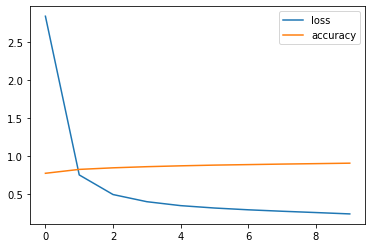

In [25]:
(pd.DataFrame(history.history)).plot()

In [31]:
# normalize data
train_data.max() 

255

In [32]:
train_data_new = train_data / 255.
test_data_new = test_data / 255.

In [39]:
#Model

model = tf.keras.models.Sequential()

model.add(tf.keras.layers.Flatten(input_shape=(28,28)))
model.add(tf.keras.layers.Dense(800, activation="relu"))
model.add(tf.keras.layers.Dense(400, activation="relu"))
model.add(tf.keras.layers.Dense(200, activation="relu"))
model.add(tf.keras.layers.Dense(10, activation="softmax"))


model.compile(loss=tf.keras.losses.categorical_crossentropy,
              optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4),
              metrics=["accuracy"])

# lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4 * 10 **(epoch/20))

norm_history = model.fit(train_data_new, 
                    tf.one_hot(train_labels,depth=10), 
                    epochs = 10,
                    validation_data = (test_data_new, tf.one_hot(test_labels, depth=10)))

Epoch 1/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.5171 - accuracy: 0.8220 - val_loss: 0.4254 - val_accuracy: 0.8473
Epoch 2/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.3671 - accuracy: 0.8696 - val_loss: 0.3918 - val_accuracy: 0.8554
Epoch 3/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.3243 - accuracy: 0.8817 - val_loss: 0.3498 - val_accuracy: 0.8734
Epoch 4/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2975 - accuracy: 0.8923 - val_loss: 0.3363 - val_accuracy: 0.8797
Epoch 5/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2753 - accuracy: 0.8985 - val_loss: 0.3385 - val_accuracy: 0.8788
Epoch 6/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2556 - accuracy: 0.9061 - val_loss: 0.3518 - val_accuracy: 0.8728
Epoch 7/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2389 - accuracy: 0.9122 - val_loss: 0.3274 - val_accuracy:

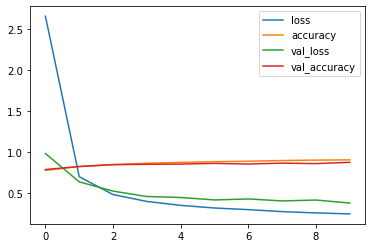

In [36]:
(pd.DataFrame(nonnorm_history.history)).plot()

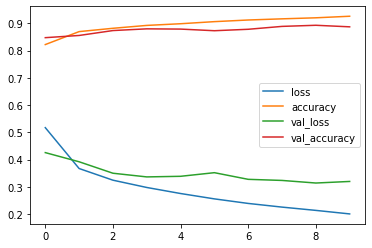

In [40]:
(pd.DataFrame(norm_history.history)).plot()

In [55]:
import itertools

def make_confustion(y_true, y_pred, classes=None, figsize=(15,15), text_size=15):
  cm = confusion_matrix(y_true, tf.round(y_pred))
  cm_norm = cm.astype("float") / cm.sum(axis=1)[:,np.newaxis]
  n_classes = cm.shape[0]

  fig, ax = plt.subplots(figsize=figsize)
  cax = ax.matshow(cm, cmap=plt.cm.Blues)
  fig.colorbar(cax)

  if classes:
    labels = classes
  else:
    labels = np.arange(cm.shape[0])

  ax.set(title="Confusion Matrix",
        xlabel="Predicted Label",
        ylabel="True Label",
        xticks=np.arange(n_classes),
        yticks=np.arange(n_classes),
        xticklabels=labels,
        yticklabels=labels)
  
  ax.xaxis.set_label_position("bottom")
  ax.xaxis.tick_bottom()

  ax.yaxis.label.set_size(text_size)
  ax.xaxis.label.set_size(text_size)
  ax.title.set_size(text_size)

  threshold = (cm.max()+cm.min()) / 2.

  for i,j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i , f"{cm[i, j]} ({cm_norm[i,j]*100:.1f}%)",
            horizontalalignment="center",
            color="white" if cm[i,j] > threshold else "black",
            size=text_size)

In [42]:
y_probs = model.predict(test_data_new)

In [46]:
class_names[tf.argmax(y_probs[0])]

'Ankle boot'

In [47]:
y_preds = y_probs.argmax(axis=1)

In [51]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_true=test_labels, y_pred=y_preds)

array([[856,   1,  14,  11,   4,   2, 109,   0,   3,   0],
       [  3, 969,   2,  21,   3,   0,   1,   0,   1,   0],
       [ 15,   0, 834,  10,  88,   0,  53,   0,   0,   0],
       [ 27,   4,  15, 890,  34,   0,  27,   0,   3,   0],
       [  1,   0,  97,  22, 836,   0,  42,   0,   2,   0],
       [  0,   0,   0,   1,   0, 987,   0,   1,   1,  10],
       [123,   0, 101,  22,  84,   0, 661,   0,   9,   0],
       [  0,   0,   0,   0,   0,  68,   0, 884,   1,  47],
       [  3,   0,   4,   4,   5,   2,   2,   2, 978,   0],
       [  0,   0,   0,   0,   0,   6,   1,  17,   0, 976]])

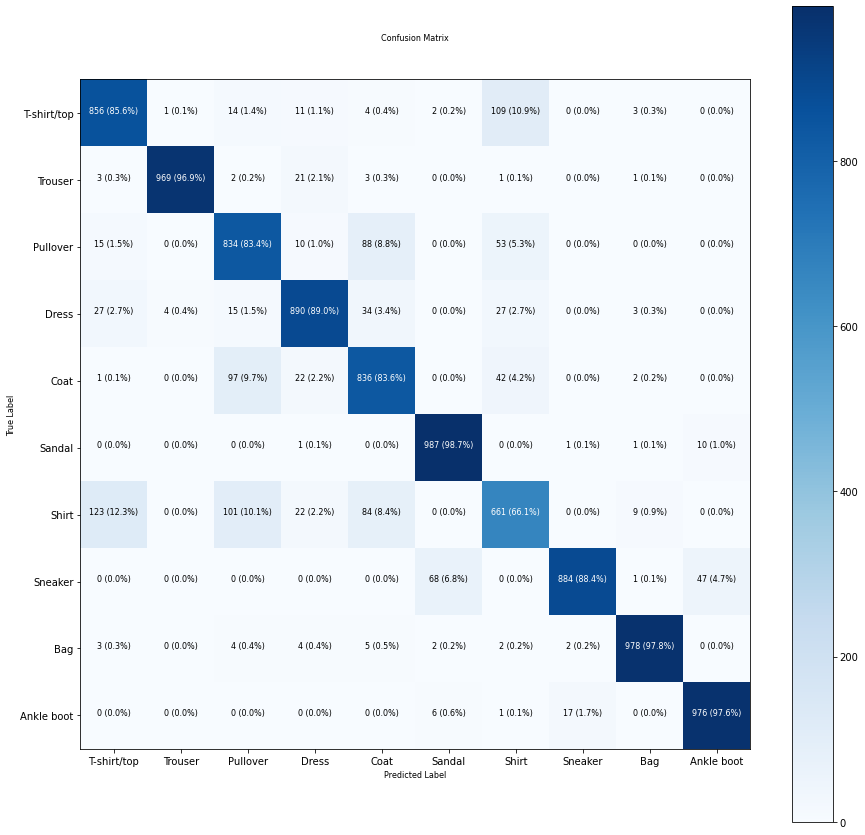

In [57]:
make_confustion(y_true=test_labels, y_pred=y_preds, classes=class_names, figsize=(15,15), text_size=8)

In [82]:
# Plot random images
def plot_random_image(model, images, true_labels, classes):

  i = random.randint(0,len(images)-1)

  target_image = images[i]

  pred_prob = model.predict(target_image.reshape(1, 28, 28))
  pred_label = classes[pred_prob.argmax()]
  true_label = classes[true_labels[i]]

  plt.imshow(target_image, cmap=plt.cm.binary)

  if pred_label == true_label:
    color = "green"
  else:
    color = "red"

  plt.xlabel("Pred: {} {:2.0f}% (True:{})".format(pred_label, 100*tf.reduce_max(pred_prob),true_label), color = color)

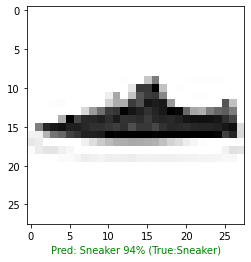

In [85]:
plot_random_image(model, test_data_new, test_labels, class_names)

In [86]:
# pattern that model learned

In [87]:
model.layers

In [88]:
#extract a layer
model.layers[1]

In [89]:
weights, biases =  model.layers[1].get_weights()